# Polynomial Regression Practices

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("FuelConsumption.csv")
cdf = df[["ENGINESIZE", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


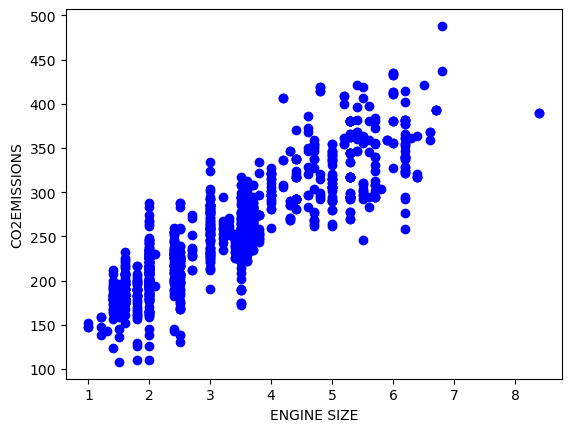

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print (len(train), len(test))

859 208


## Transform the polynomial feature to linear

In [6]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

print (train_x[:3], len(train_x))
print (train_x_poly[:3], len(train_x_poly))

[[2. ]
 [3.5]
 [3.5]] 859
[[ 1.    2.    4.  ]
 [ 1.    3.5  12.25]
 [ 1.    3.5  12.25]] 859


## Train a linear model based on the new extracted feature

In [7]:
regr = linear_model.LinearRegression()
train_y_ = regr.fit(train_x_poly, train_y)

intercept = regr.intercept_
coefs = regr.coef_
print ("Coefficients are: ", coefs)
print ("Intecept is: ", intercept)

Coefficients are:  [[ 0.         48.09131519 -1.26079066]]
Intecept is:  [112.02910489]


## Plot the scatter diagram and the equation line

The equation formula is: y = (-1.261)x2 + (48.091)x + 112.029


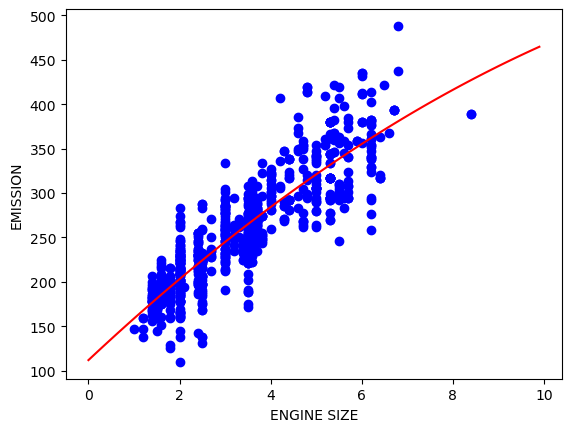

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = intercept[0] + coefs[0][1]*XX + coefs[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'r')
plt.xlabel("ENGINE SIZE")
plt.ylabel("EMISSION")

a = coefs[0][2]
b = coefs[0][1]
c = intercept[0]
print (f"The equation formula is: y = ({a:.3f})x2 + ({b:.3f})x + {c:.3f}")

## Evaluation

In [10]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = regr.predict(test_x_poly)
print ("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print ("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print ("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 23.46
Residual sum of squares (MSE): 977.45
R2-score: 0.77
